In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 978.8/978.8 kB 45.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 94.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 76.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 49.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 34.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 95.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstal

In [2]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="oMwWp1a5SObWIq3f84aL")
project = rf.workspace("traffic-management-wxhga").project("emergency_dataset")
version = project.version(4)
dataset = version.download("yolov8")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.2/85.2 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 44.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 112.6 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to emergency_dataset-4 in yolov8:: 100%|██████████| 9962/9962 [00:01<00:00, 6826.27it/s]


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [3]:
from ultralytics import YOLO

In [4]:
import ultralytics
print(ultralytics.__version__)

8.3.110


In [5]:
from ultralytics import YOLO

# Load YOLOv8s model
model = YOLO("yolov8n.pt")

100%|██████████| 6.25M/6.25M [00:00<00:00, 335MB/s]


In [6]:
from ultralytics import YOLO

results = model.train(
    data="/content/emergency_dataset-4/data.yaml",
    imgsz=640,
    epochs=40,
    save_period=1,
    degrees=10,
    translate=0.1,
    scale=0.5,
    shear=2.0,
    perspective=0.0005,
    flipud=0.2,
    fliplr=0.5,
    mosaic=1.0,
    mixup=0.2,
    hsv_h=0.015,
    hsv_s=0.7,
    hsv_v=0.4
)

Ultralytics 8.3.110 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/emergency_dataset-4/data.yaml, epochs=40, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show

100%|██████████| 755k/755k [00:00<00:00, 125MB/s]


Overriding model.yaml nc=80 with nc=5

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 308MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 973.8±482.7 MB/s, size: 50.0 KB)


train: Scanning /content/emergency_dataset-4/train/labels... 3486 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3486/3486 [00:02<00:00, 1427.35it/s]

train: New cache created: /content/emergency_dataset-4/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 2984, len(boxes) = 4288. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 785.6±648.0 MB/s, size: 59.6 KB)


val: Scanning /content/emergency_dataset-4/valid/labels... 993 images, 0 backgrounds, 0 corrupt: 100%|██████████| 993/993 [00:00<00:00, 1098.58it/s]

val: New cache created: /content/emergency_dataset-4/valid/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 970, len(boxes) = 1242. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train
Starting training for 40 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/40      2.14G      1.361      2.537      1.759         44        640: 100%|██████████| 218/218 [00:23<00:00,  9.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  6.20it/s]


                   all        993       1242      0.477      0.475       0.46      0.247

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/40      2.69G      1.348      2.062       1.74         63        640: 100%|██████████| 218/218 [00:20<00:00, 10.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:03<00:00,  8.01it/s]


                   all        993       1242      0.497      0.559      0.482      0.251

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/40       2.7G      1.374      1.949      1.764         37        640: 100%|██████████| 218/218 [00:19<00:00, 11.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:03<00:00,  8.16it/s]

                   all        993       1242      0.549      0.572      0.554      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/40      2.71G      1.362      1.823      1.743         53        640: 100%|██████████| 218/218 [00:20<00:00, 10.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:03<00:00,  8.39it/s]

                   all        993       1242      0.582      0.604      0.582      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/40      2.73G      1.346      1.759      1.727         51        640: 100%|██████████| 218/218 [00:20<00:00, 10.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:03<00:00,  8.30it/s]

                   all        993       1242      0.659      0.543      0.584      0.325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/40      2.75G      1.312      1.673      1.709         42        640: 100%|██████████| 218/218 [00:20<00:00, 10.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:03<00:00,  8.42it/s]

                   all        993       1242      0.603      0.631       0.62      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/40      2.76G      1.294      1.614      1.686         42        640: 100%|██████████| 218/218 [00:19<00:00, 10.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:03<00:00,  8.20it/s]

                   all        993       1242      0.627      0.677      0.679      0.381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/40      2.78G      1.266      1.583       1.66         38        640: 100%|██████████| 218/218 [00:19<00:00, 11.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:03<00:00,  8.30it/s]

                   all        993       1242      0.696      0.687      0.728      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/40       2.8G      1.256      1.528       1.65         61        640: 100%|██████████| 218/218 [00:19<00:00, 10.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:03<00:00,  8.31it/s]

                   all        993       1242      0.708      0.739      0.766      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/40      2.81G      1.235      1.518      1.643         40        640: 100%|██████████| 218/218 [00:19<00:00, 10.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:03<00:00,  8.36it/s]

                   all        993       1242      0.728      0.749      0.769      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/40      2.83G      1.211      1.469      1.615         54        640: 100%|██████████| 218/218 [00:19<00:00, 10.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:03<00:00,  8.44it/s]

                   all        993       1242      0.743      0.748      0.786      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/40      2.85G      1.224      1.443      1.619         40        640: 100%|██████████| 218/218 [00:19<00:00, 11.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:03<00:00,  8.33it/s]

                   all        993       1242      0.725       0.72       0.78      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/40      2.87G      1.206      1.413      1.608         43        640: 100%|██████████| 218/218 [00:19<00:00, 11.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:03<00:00,  8.44it/s]

                   all        993       1242      0.746      0.725        0.8      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/40      2.88G      1.178      1.381       1.59         55        640: 100%|██████████| 218/218 [00:19<00:00, 10.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:03<00:00,  8.32it/s]

                   all        993       1242      0.773      0.728      0.797      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/40       2.9G      1.167      1.365      1.587         56        640: 100%|██████████| 218/218 [00:19<00:00, 11.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:03<00:00,  8.17it/s]

                   all        993       1242      0.756      0.799      0.838      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/40      2.92G       1.16      1.361       1.58         52        640: 100%|██████████| 218/218 [00:19<00:00, 11.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:03<00:00,  8.28it/s]

                   all        993       1242      0.803      0.803      0.855      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/40      2.94G      1.149      1.332      1.569         52        640: 100%|██████████| 218/218 [00:19<00:00, 11.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:03<00:00,  8.32it/s]

                   all        993       1242      0.818      0.762      0.846      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/40      2.95G      1.153      1.315       1.57         58        640: 100%|██████████| 218/218 [00:19<00:00, 10.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:03<00:00,  8.36it/s]

                   all        993       1242      0.816      0.785      0.858      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/40      2.97G      1.139      1.285      1.565         53        640: 100%|██████████| 218/218 [00:19<00:00, 11.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:03<00:00,  8.37it/s]

                   all        993       1242      0.833      0.787      0.864      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/40      2.98G      1.142      1.273      1.554         44        640: 100%|██████████| 218/218 [00:19<00:00, 10.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:03<00:00,  8.51it/s]

                   all        993       1242      0.828      0.818      0.879      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/40         3G      1.122      1.244      1.532         45        640: 100%|██████████| 218/218 [00:19<00:00, 10.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:03<00:00,  8.20it/s]

                   all        993       1242      0.874      0.827        0.9      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/40      3.02G      1.113      1.226       1.53         47        640: 100%|██████████| 218/218 [00:20<00:00, 10.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:03<00:00,  8.25it/s]

                   all        993       1242      0.857      0.784      0.873      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/40      3.04G      1.114      1.221      1.529         53        640: 100%|██████████| 218/218 [00:19<00:00, 10.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:03<00:00,  8.29it/s]

                   all        993       1242      0.833      0.819      0.885      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/40      3.05G      1.102      1.207      1.519         49        640: 100%|██████████| 218/218 [00:20<00:00, 10.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:03<00:00,  8.41it/s]

                   all        993       1242      0.843       0.84      0.899      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/40      3.07G      1.098      1.177      1.518         41        640: 100%|██████████| 218/218 [00:20<00:00, 10.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:03<00:00,  8.54it/s]

                   all        993       1242      0.883      0.823      0.896      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/40      3.09G      1.098      1.188      1.521         42        640: 100%|██████████| 218/218 [00:20<00:00, 10.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:03<00:00,  8.27it/s]

                   all        993       1242      0.885      0.852      0.911       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/40      3.11G      1.074      1.146        1.5         55        640: 100%|██████████| 218/218 [00:19<00:00, 11.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:03<00:00,  8.50it/s]

                   all        993       1242      0.889      0.831      0.911      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/40      3.12G      1.083       1.14      1.503         47        640: 100%|██████████| 218/218 [00:20<00:00, 10.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:03<00:00,  8.31it/s]

                   all        993       1242      0.908      0.864      0.924       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/40      3.14G      1.082      1.146      1.502         32        640: 100%|██████████| 218/218 [00:19<00:00, 10.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:03<00:00,  8.25it/s]

                   all        993       1242      0.887      0.854      0.911      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/40      3.16G      1.069      1.143      1.494         60        640: 100%|██████████| 218/218 [00:19<00:00, 10.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:03<00:00,  8.45it/s]

                   all        993       1242       0.89      0.857      0.912      0.642


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/40      3.17G     0.8536     0.7595      1.458         16        640: 100%|██████████| 218/218 [00:19<00:00, 10.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:03<00:00,  8.17it/s]

                   all        993       1242      0.861      0.866      0.917      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/40      3.19G     0.8247     0.7128      1.434         18        640: 100%|██████████| 218/218 [00:18<00:00, 11.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:03<00:00,  8.48it/s]

                   all        993       1242      0.892      0.819      0.908      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/40      3.21G     0.8266     0.6791      1.435         17        640: 100%|██████████| 218/218 [00:19<00:00, 11.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:03<00:00,  8.06it/s]

                   all        993       1242      0.912      0.883      0.931       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/40      3.22G      0.807     0.6534      1.412         16        640: 100%|██████████| 218/218 [00:18<00:00, 11.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:03<00:00,  8.36it/s]

                   all        993       1242      0.879       0.88      0.926      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/40      3.24G     0.7876      0.614      1.392         17        640: 100%|██████████| 218/218 [00:19<00:00, 11.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:03<00:00,  8.46it/s]

                   all        993       1242      0.911      0.884       0.93      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/40      3.26G     0.7782     0.6098      1.389         18        640: 100%|██████████| 218/218 [00:19<00:00, 11.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:03<00:00,  8.56it/s]

                   all        993       1242      0.911      0.872      0.928      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/40      3.28G     0.7733      0.593      1.381         14        640: 100%|██████████| 218/218 [00:19<00:00, 11.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:03<00:00,  8.26it/s]

                   all        993       1242      0.908      0.888      0.934      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/40      3.29G     0.7612     0.5655       1.37         18        640: 100%|██████████| 218/218 [00:19<00:00, 11.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:03<00:00,  8.41it/s]

                   all        993       1242      0.912      0.886      0.935      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/40      3.31G     0.7513     0.5516      1.357         16        640: 100%|██████████| 218/218 [00:18<00:00, 11.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:03<00:00,  8.27it/s]

                   all        993       1242      0.913      0.894      0.939      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/40      3.33G     0.7566     0.5515      1.362         15        640: 100%|██████████| 218/218 [00:19<00:00, 11.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:03<00:00,  8.27it/s]

                   all        993       1242      0.934      0.901      0.946      0.694



40 epochs completed in 0.268 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.110 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
Model summary (fused): 72 layers, 3,006,623 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  6.61it/s]


                   all        993       1242      0.935      0.901      0.946      0.694
          AmbulanceOff        462        568      0.929      0.898      0.939       0.69
           AmbulanceOn         74         74      0.931      0.919      0.967      0.804
         FireEngineOff        266        300      0.926      0.833       0.91      0.576
          FireEngineOn         53         61      0.931      0.934      0.942      0.722
             PoliceCar        186        239      0.957      0.922      0.969      0.678
Speed: 0.1ms preprocess, 0.5ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/train


In [7]:
# Evaluate the model after training
metrics = model.val()

print(f"mAP@0.5       : {metrics.box.map50:.4f}")
print(f"mAP@0.5:0.95  : {metrics.box.map:.4f}")
print(f"Precision     : {metrics.box.p[0]:.4f}")
print(f"Recall        : {metrics.box.r[0]:.4f}")

Ultralytics 8.3.110 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
Model summary (fused): 72 layers, 3,006,623 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1228.9±717.7 MB/s, size: 59.0 KB)


val: Scanning /content/emergency_dataset-4/valid/labels.cache... 993 images, 0 backgrounds, 0 corrupt: 100%|██████████| 993/993 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 970, len(boxes) = 1242. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:05<00:00, 11.12it/s]


                   all        993       1242      0.934      0.901      0.946      0.695
          AmbulanceOff        462        568      0.929      0.898      0.939       0.69
           AmbulanceOn         74         74       0.93      0.919      0.967      0.804
         FireEngineOff        266        300      0.923      0.833       0.91      0.578
          FireEngineOn         53         61       0.93      0.934      0.942      0.722
             PoliceCar        186        239      0.957       0.92      0.969      0.679
Speed: 0.3ms preprocess, 1.0ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/train2
mAP@0.5       : 0.9456
mAP@0.5:0.95  : 0.6946
Precision     : 0.9290
Recall        : 0.8979


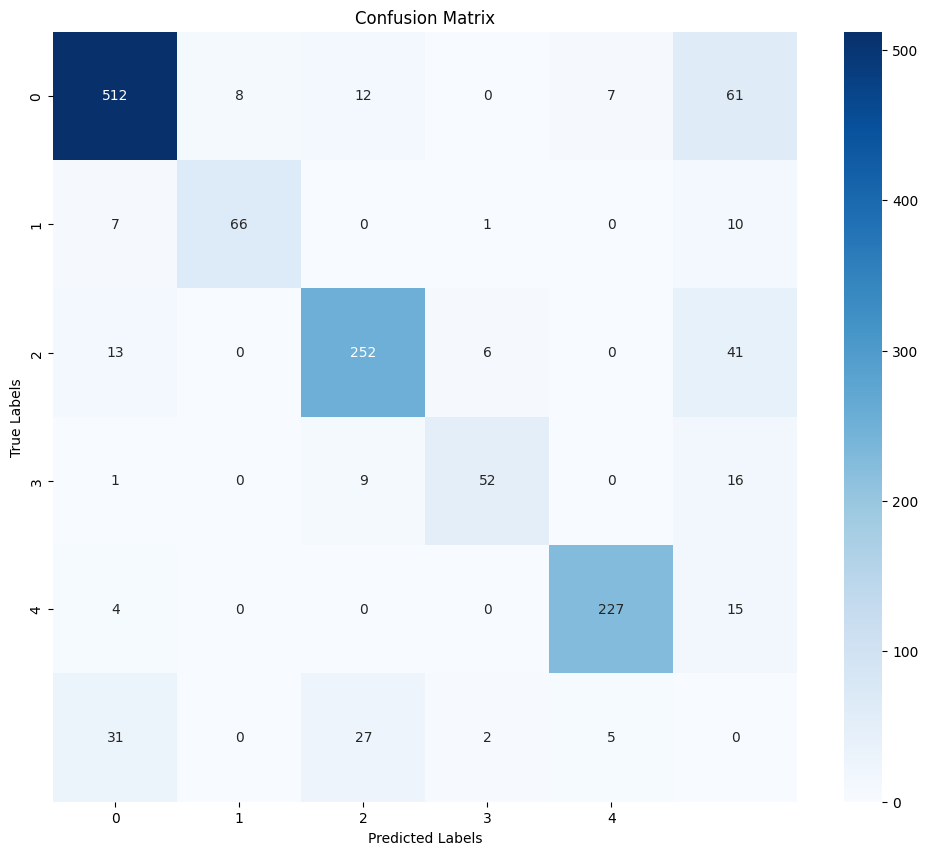

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Extract confusion matrix
confusion_matrix = metrics.confusion_matrix.matrix
class_names = metrics.names

# Plot confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(confusion_matrix, annot=True, fmt='g', xticklabels=class_names, yticklabels=class_names, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

   epoch      time  train/box_loss  train/cls_loss  train/dfl_loss  \
0      1   31.8341         1.36064         2.53682         1.75886   
1      2   56.6315         1.34770         2.06161         1.73985   
2      3   80.6385         1.37410         1.94904         1.76434   
3      4  104.9050         1.36201         1.82318         1.74277   
4      5  129.1610         1.34552         1.75905         1.72681   

   metrics/precision(B)  metrics/recall(B)  metrics/mAP50(B)  \
0               0.47719            0.47481           0.45987   
1               0.49675            0.55931           0.48187   
2               0.54941            0.57181           0.55433   
3               0.58194            0.60422           0.58219   
4               0.65894            0.54328           0.58397   

   metrics/mAP50-95(B)  val/box_loss  val/cls_loss  val/dfl_loss    lr/pg0  \
0              0.24729       1.51038       2.05726       2.10623  0.000369   
1              0.25132       1.69303  

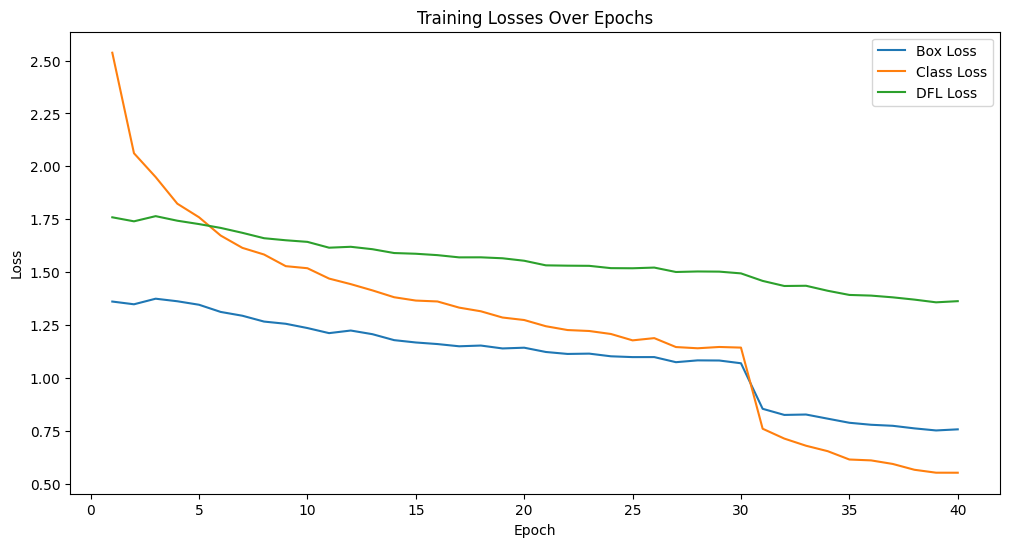

In [9]:
#Detailed Training Metrics

import pandas as pd
results_path = '/content/runs/detect/train/results.csv'
df_results = pd.read_csv(results_path)

print(df_results.head())

plt.figure(figsize=(12, 6))
plt.plot(df_results['epoch'], df_results['train/box_loss'], label='Box Loss')
plt.plot(df_results['epoch'], df_results['train/cls_loss'], label='Class Loss')
plt.plot(df_results['epoch'], df_results['train/dfl_loss'], label='DFL Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Losses Over Epochs')
plt.legend()
plt.show()
#Accurately fetches and visualizes logged training metrics.

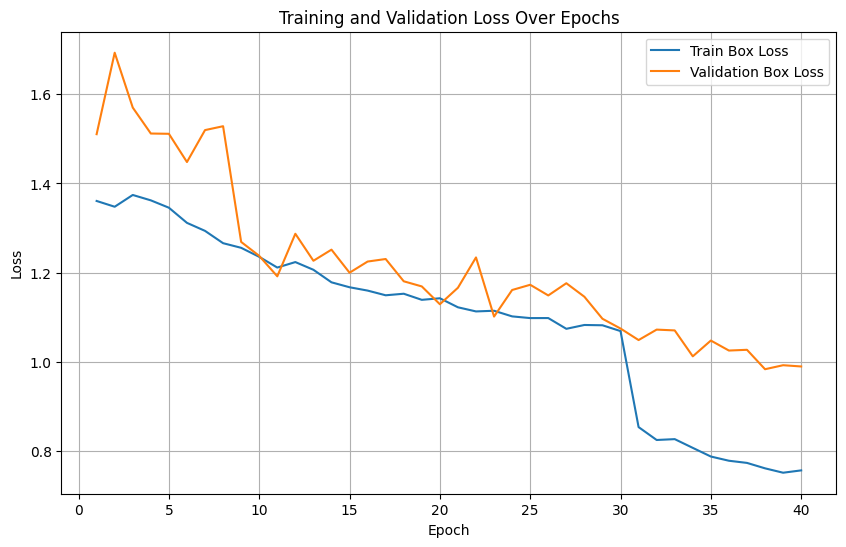

In [10]:
plt.figure(figsize=(10,6))
plt.plot(df_results['epoch'], df_results['train/box_loss'], label='Train Box Loss')
plt.plot(df_results['epoch'], df_results['val/box_loss'], label='Validation Box Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.grid()
plt.show()

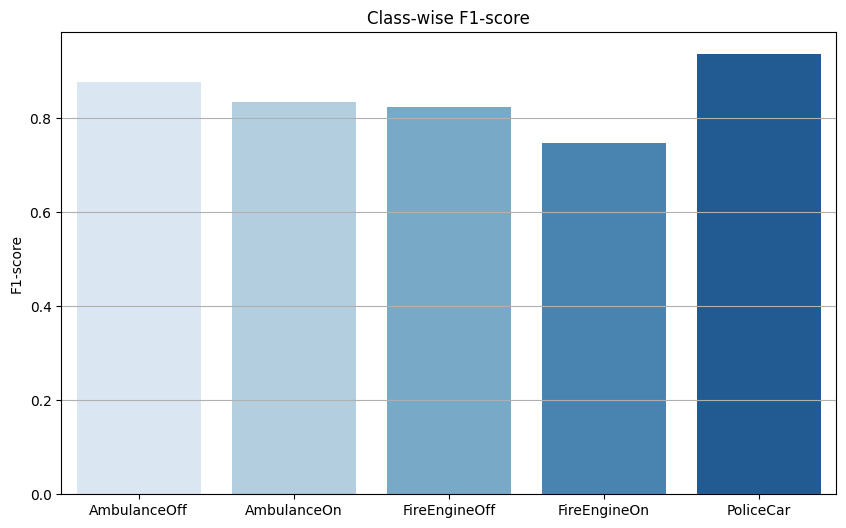

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report

# Confusion matrix from YOLO metrics
cm = metrics.confusion_matrix.matrix

# Manually define your class names (must match your confusion matrix exactly!)
class_names = ['AmbulanceOff', 'AmbulanceOn', 'FireEngineOff', 'FireEngineOn', 'PoliceCar']

# Expand confusion matrix correctly into y_true and y_pred
y_true = []
y_pred = []

for true_label, row in enumerate(cm):
    for pred_label, count in enumerate(row):
        y_true.extend([true_label] * int(count))
        y_pred.extend([pred_label] * int(count))

# Ensure labels match exactly
labels = list(range(len(class_names)))

# Generate the classification report
report = classification_report(y_true, y_pred, labels=labels, target_names=class_names, output_dict=True)

# Extract F1-scores from report
f1_scores = [report[cls]['f1-score'] for cls in class_names]

# Plot F1-scores
plt.figure(figsize=(10, 6))
sns.barplot(x=class_names, y=f1_scores, palette="Blues")
plt.ylabel('F1-score')
plt.title('Class-wise F1-score')
plt.grid(axis='y')
plt.show()


In [12]:
from ultralytics import YOLO

model = YOLO('/content/runs/detect/train/weights/best.pt')

img_path = '/content/emergency_dataset-4/train/images'

model.predict(source=img_path, save=True)

results = model(img_path)

Streaming output truncated to the last 5000 lines.
image 1988/3486 /content/emergency_dataset-4/train/images/PXQF7MONUBYM_jpg.rf.4de7cd24f11f559b5b232aaf2666a777.jpg: 640x640 2 PoliceCars, 7.3ms
image 1989/3486 /content/emergency_dataset-4/train/images/PXQF7MONUBYM_jpg.rf.61fad1183e40d06503f6a04a8f9e1435.jpg: 640x640 2 PoliceCars, 7.8ms
image 1990/3486 /content/emergency_dataset-4/train/images/PYVL1G0U7OOL_jpg.rf.820094567cc7158c73a2de5d290b47c0.jpg: 640x640 1 AmbulanceOff, 7.6ms
image 1991/3486 /content/emergency_dataset-4/train/images/PYVL1G0U7OOL_jpg.rf.a3eace24d55681cdcf41c158a3841135.jpg: 640x640 1 AmbulanceOff, 7.4ms
image 1992/3486 /content/emergency_dataset-4/train/images/PZG4QKP0MHGL_jpg.rf.96f3d19e5c215836be055150dd85f6b2.jpg: 640x640 3 AmbulanceOffs, 7.5ms
image 1993/3486 /content/emergency_dataset-4/train/images/PZG4QKP0MHGL_jpg.rf.c245bc155ccd7a5d6444b2f0fe9489c2.jpg: 640x640 3 AmbulanceOffs, 9.7ms
image 1994/3486 /content/emergency_dataset-4/train/images/PZYKE4UOBEDG_jpg.

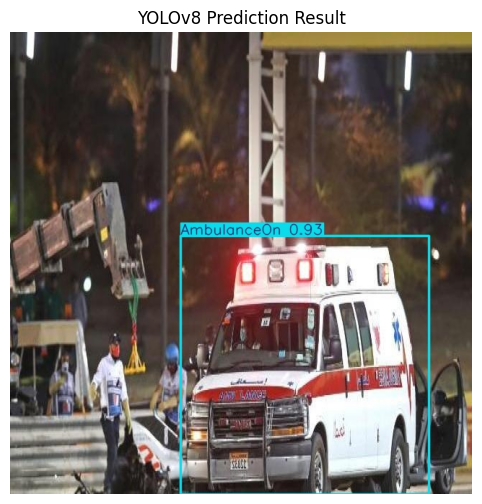

In [21]:
from PIL import Image as PILImage
import matplotlib.pyplot as plt
import glob

# Define the predicted images folder
predicted_images_path = "/content/runs/detect/predict/"

# Get predicted image from the folder
predicted_images = glob.glob(predicted_images_path + "*.jpg")

if predicted_images:
    image_path = predicted_images[904]

    try:
        img = PILImage.open(image_path)

        # Display the image
        plt.figure(figsize=(8, 6))
        plt.imshow(img)
        plt.axis('off')  # Hide the axes
        plt.title("YOLOv8 Prediction Result")
        plt.show()

    except Exception as e:
        print(f"Error opening {image_path}: {e}")
else:
    print("No predicted images found in the folder.")

In [24]:
#Final Summary
print("Summary of YOLOv8 Experiment 2")
print("Model Used: YOLOv8n (Nano)")
print(f"Final mAP@0.5: {metrics.box.map50:.4f}")
print(f"Final mAP@0.5:0.95: {metrics.box.map:.4f}")
print(f"Precision     : {metrics.box.p[0]:.4f}")
print(f"Recall        : {metrics.box.r[0]:.4f}")

Summary of YOLOv8 Experiment 2
Model Used: YOLOv8n (Nano)
Final mAP@0.5: 0.9456
Final mAP@0.5:0.95: 0.6946
Precision     : 0.9290
Recall        : 0.8979
